In [1]:
from base64 import b64encode
import json
import requests
import os
import dotenv
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
%matplotlib inline

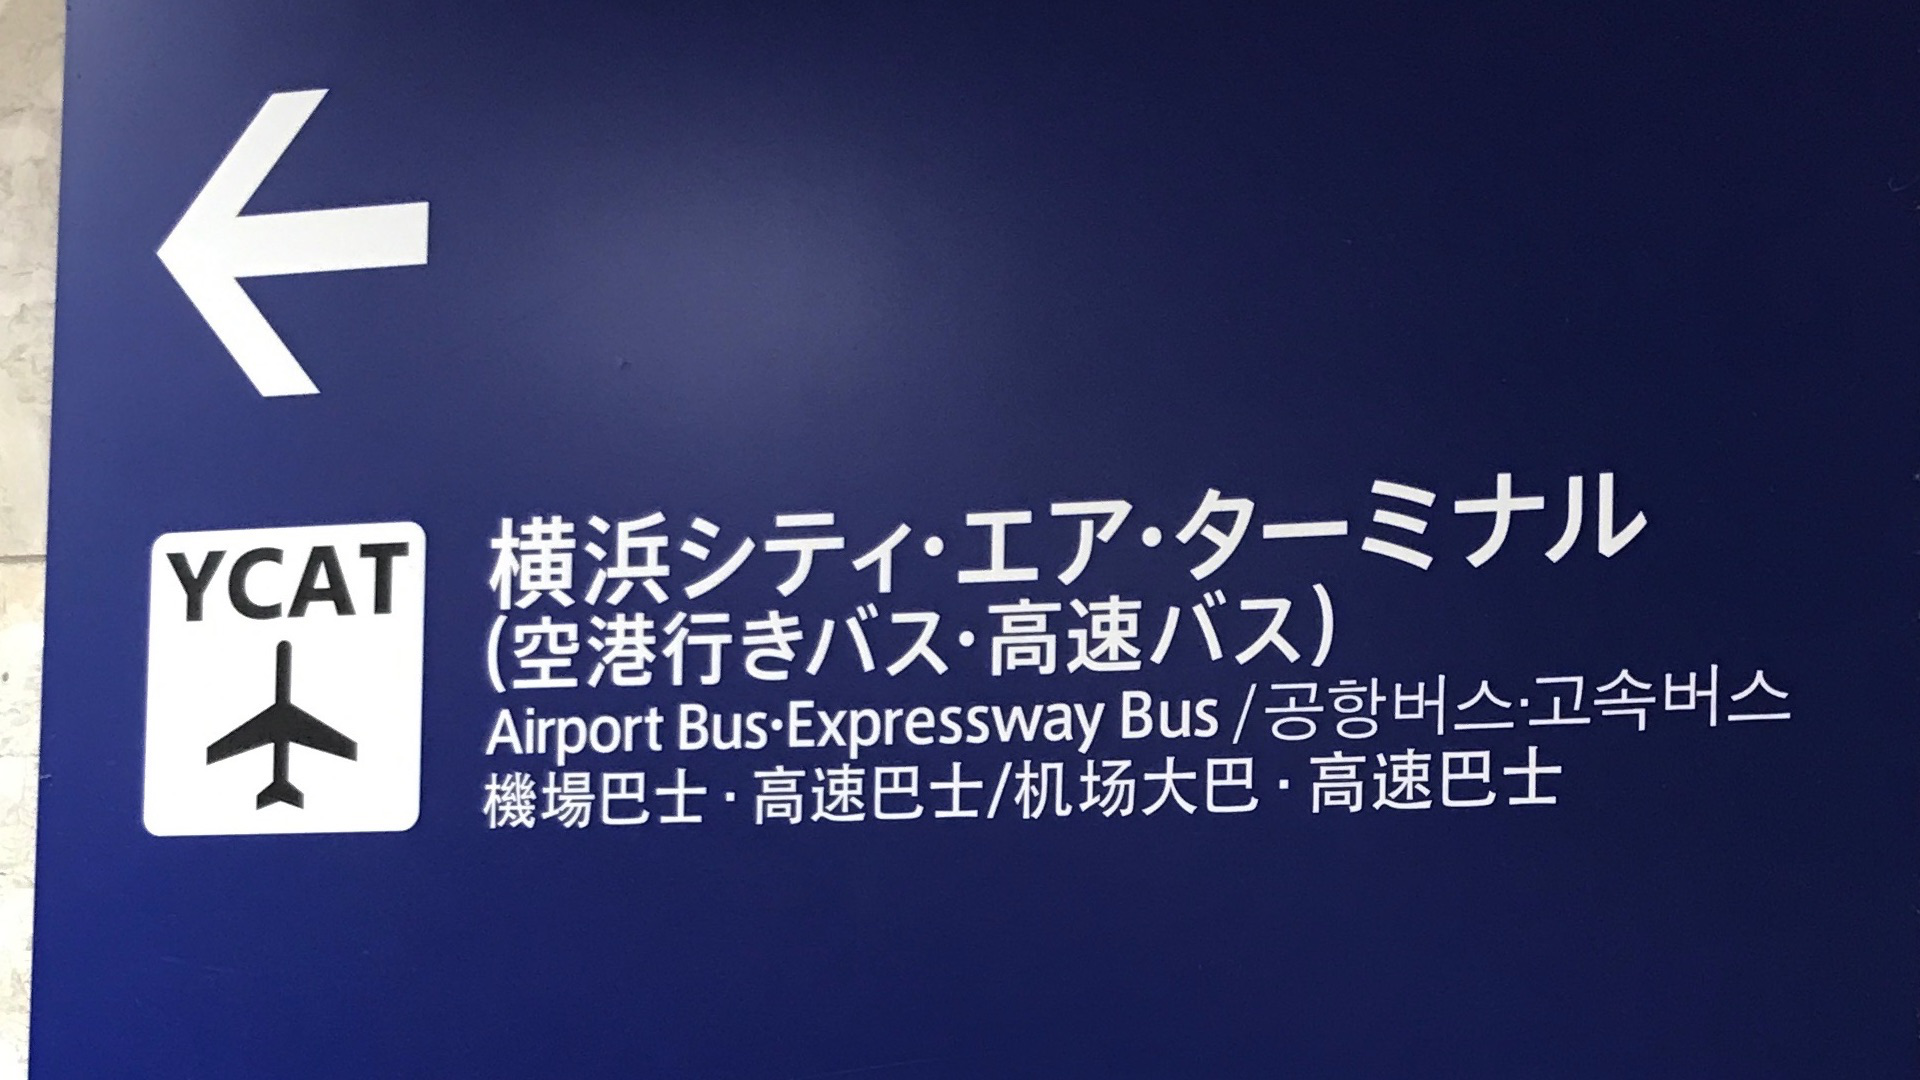

In [2]:
# 対象の画像
image = Image.open('./text.jpg')
image

In [3]:
# .envの読み込み
dotenv.load_dotenv('./.env')
# key取得
api_key = os.environ.get('API_KEY')

In [4]:
endpoint_url = 'https://vision.googleapis.com/v1/images:annotate'
# 画像ファイル読み込み
f = open('./text.jpg', 'rb')
# base64にエンコード
ctxt = b64encode(f.read()).decode(仕方)

In [5]:
# request内容
img_requests = [{
    'image': {'content': ctxt},
    'features':[{
        'type': 'TEXT_DETECTION',
        'maxResults': 10
    }]
}]

In [6]:
# リクエスト送信
response = requests.post(endpoint_url,
                         data=json.dumps({'requests': img_requests}).encode(),
                         params={'key': api_key},
                         headers={'Content-Type': 'application/json'})

In [7]:
# レスポンス結果
print(json.dumps(response.json(), indent=4))

{
    "responses": [
        {
            "textAnnotations": [
                {
                    "locale": "ja",
                    "description": "YCAT\n\u6a2a\u6d5c\u30b7\u30c6\u30a3\u00b7\u30a8\u30a2\u00b7\u30bf\u30fc\u30df\u30ca\u30eb\n(\u7a7a\u6e2f\u884c\u304d\u30d0\u30b9\u00b7\u9ad8\u901f\u30d0\u30b9)\nAirport Bus-Expressway Bus /\uacf5\ud56d\ubc84\uc2a4 \uace0\uc18d\ubc84\uc2a4\n\u6a5f\u5834\u5df4\u58eb\u00b7\u9ad8\u901f\u5df4\u58eb/\u673a\u573a\u5927\u5df4,\u9ad8\u901f\u5df4\u58eb\n",
                    "boundingPoly": {
                        "vertices": [
                            {
                                "x": 171,
                                "y": 467
                            },
                            {
                                "x": 1791,
                                "y": 467
                            },
                            {
                                "x": 1791,
                                "y": 828
                 

In [18]:
data = response.json()['responses'][0]['textAnnotations']
for i, row in enumerate(data):
    print(i)
    print(row['description'])

0
YCAT
横浜シティ·エア·ターミナル
(空港行きバス·高速バス)
Airport Bus-Expressway Bus /공항버스 고속버스
機場巴士·高速巴士/机场大巴,高速巴士

1
YCAT
2
横浜
3
シティ
4
·
5
エア
6
·
7
ターミナル
8
(
9
空港
10
行き
11
バス
12
·
13
高速
14
バス
15
)
16
Airport
17
Bus
18
-
19
Expressway
20
Bus
21
/
22
공항
23
버스
24
고속
25
버스
26
機場
27
巴士
28
·
29
高速
30
巴士
31
/
32
机场
33
大巴
34
,
35
高速
36
巴士


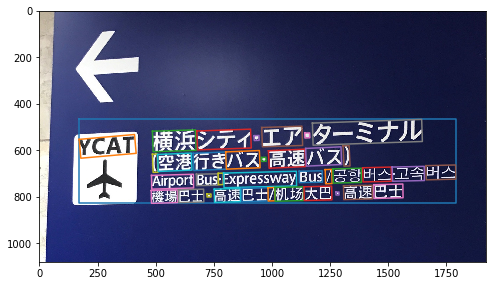

In [22]:
# 検知の仕方
plt.figure(figsize=(8, 6))
im = Image.open('./text.jpg', 'r')
plt.imshow(im)
# ラベルの検知の仕方
for row in data:
    data_ = []
    for bp in row['boundingPoly']['vertices']:
        data_.append([bp['x'], bp['y']])
    data_.append(data_[0])
    graph_ = np.array(data_).T
    plt.plot(graph_[0], graph_[1])